In [96]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from ls_fringeapp import fringeprocess as fp


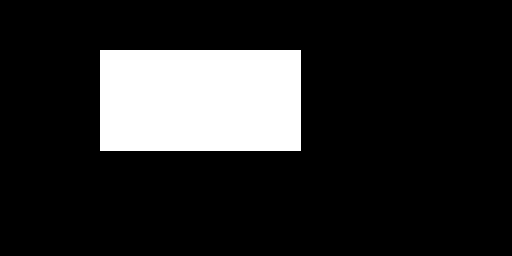

In [97]:
# start simple
img = Image.new(mode="L", size=(512, 256))
draw = ImageDraw.Draw(img)
draw.rectangle((100, 50, 300, 150), fill="white")
img

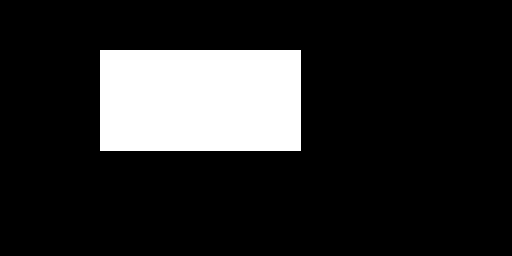

In [98]:
# identity affine
# x′=ax+by+c
# y′=dx+ey+f


img3 = img.transform((512, 256), Image.AFFINE, (1, 0, 0, 0, 1, 0), Image.BICUBIC)
img3

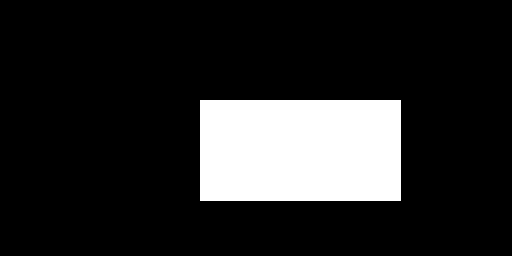

In [99]:
# translation
img3 = img.transform((512, 256), Image.AFFINE, (1, 0, -100, 0, 1, -50), Image.BICUBIC)
img3

In [100]:
# find the affine coeffs needed by PIL transform
# with some linear algebra


def affine_coeffs(pa, pb):
    """
    pa : 3 or more points on original plane
    pb : points on transformed plane
    finds the coefficients needed in
    PIL.Image.transform(size, PIL.Image.AFFINE, a_coeffs, PIL.Image.BICUBIC)
    to transform the pixels in an image from pa to pb,
    these are the coordinates of a transform matrix A

    A = [a, b, c]
        [d, e, f]
        [0, 0, 1]

    where a_coeffs = (a, b, c, d, e, f)
    and X1 * inv(A) = X2  - check multiplication order
    could probably simplify and remove the 2nd inverse calculation
    """
    pa = pa.reshape(-1, 2)
    X1 = np.hstack((pa, np.ones((pa.shape[0], 1))))
    pb = pb.reshape(-1, 2)
    X2 = np.hstack((pb, np.ones((pb.shape[0], 1))))
    X1_inv = np.linalg.pinv(X1)
    A = np.dot(X1_inv, X2)
    inv_A = np.linalg.inv(A)
    a_coeffs = inv_A[:, :2].T.flatten()
    return a_coeffs


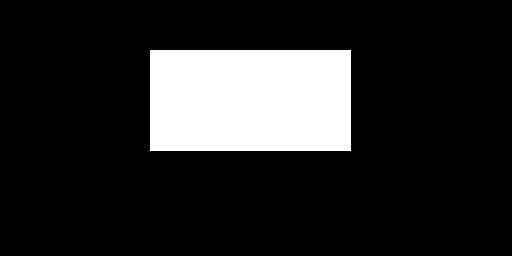

In [101]:
# translate
pa = np.array([(100, 50), (100, 300), (200, 50), (200, 300)])
pb = np.array([(150, 50), (150, 300), (250, 50), (250, 300)])
a_params = affine_coeffs(pa, pb)
img3 = img.transform((512, 256), Image.AFFINE, a_params, Image.BICUBIC)
img3

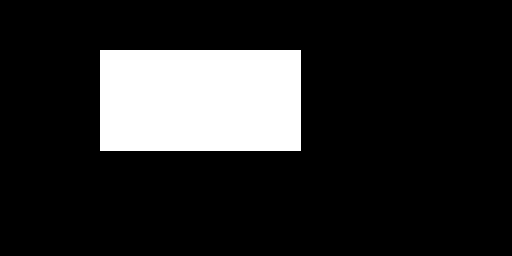

In [102]:
img

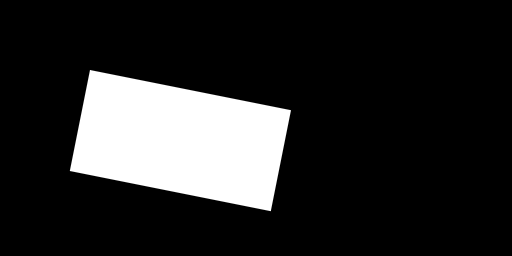

In [103]:
# rotate
pa = np.array([(100, 100), (100, 300), (200, 100), (200, 300)])
pb = np.array([[80.0, 120.0], [40.0, 320.0], [180.0, 140.0], [140.0, 340.0]])
a_params = affine_coeffs(pa, pb)

img3 = img.transform((512, 256), Image.AFFINE, a_params, Image.BICUBIC)
img3

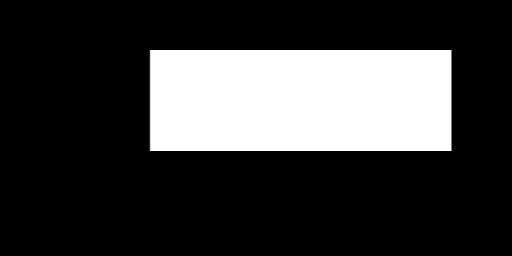

In [104]:
# scale across (x)
pa = np.array([(100, 100), (100, 300), (200, 100), (200, 300)])
pb = np.array([[150.0, 100.0], [150.0, 300.0], [300.0, 100.0], [300.0, 300.0]])
a_params = affine_coeffs(pa, pb)

img3 = img.transform((512, 256), Image.AFFINE, a_params, Image.BICUBIC)
img3

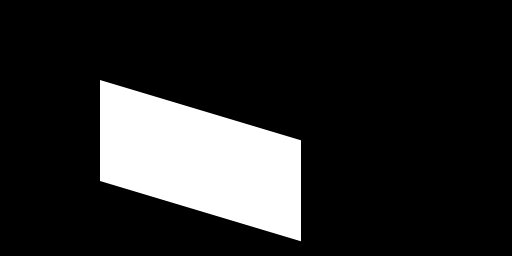

In [105]:
# shear
pa = np.array([(100, 100), (100, 300), (200, 100), (200, 300)])
pb = np.array([[100.0, 130.0], [100.0, 330.0], [200.0, 160.0], [200.0, 360.0]])
a_params = affine_coeffs(pa, pb)

img3 = img.transform((512, 256), Image.AFFINE, a_params, Image.BICUBIC)
img3

In [ ]:
# something more gauge block shaped
img = Image.new(mode="RGB", size=(128, 256), color=(0, 150, 0))
draw = ImageDraw.Draw(img)
pa = np.array([(20, 10), (20, 210), (90, 210)])
pa

array([[ 20,  10],
       [ 20, 210],
       [ 90, 210]])

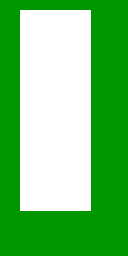

In [ ]:
draw.rectangle((pa[0, 0], pa[0, 1], pa[2, 0], pa[2, 1]), fill="white")
img

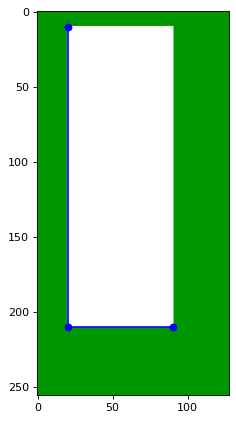

In [186]:
fig = plt.figure(figsize=(20, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(np.asarray(img))
axes.axis("image")
axes.plot(pa[:, 0], pa[:, 1], "b-o")

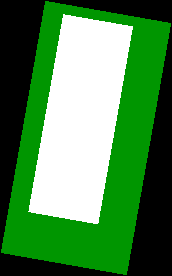

In [236]:
angle_deg = -10.0
phi = np.deg2rad(angle_deg)
img_gb = img.rotate(angle_deg, expand=True)
img_gb

In [234]:
c, s = np.cos(-phi), np.sin(-phi)
R1 = np.array(((c, -s), (s, c)))
pb = np.dot(R1, pa.T).T

shift = (img_gb.size[0] - img.size[0], 0)
shift = (-44, 0)
pb = pb + shift

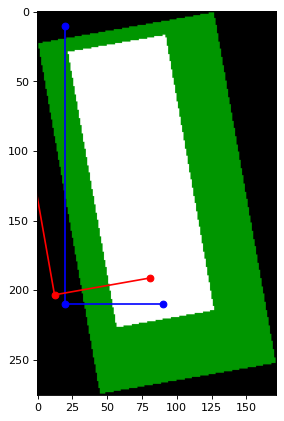

In [235]:
fig = plt.figure(figsize=(20, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(np.asarray(img_gb))
axes.axis("image")
axes.plot(pa[:, 0], pa[:, 1], "b-o")
axes.plot(pb[:, 0], pb[:, 1], "r-o")

In [233]:
np.array(img_gb.size) - np.array(img.size)

array([44, 20])

In [171]:
length = ((pb[0, :] - pb[1, :]) ** 2).sum() ** 0.5
width = ((pb[1, :] - pb[2, :]) ** 2).sum() ** 0.5
length, width

(np.float64(200.9975124224178), np.float64(100.4987562112089))

In [110]:
dirn = (pb[2, :] - pb[1, :]) / width
sq_pts = pb[0:2, :] + length * dirn
sq_pts


array([[290., 130.],
       [270., 330.]])

In [111]:
pb2 = np.vstack((pb[0], pb[1], sq_pts[1], sq_pts[0]))
pb2

array([[ 90., 110.],
       [ 70., 310.],
       [270., 330.],
       [290., 130.]])

(np.float64(59.0), np.float64(301.0), np.float64(99.0), np.float64(341.0))

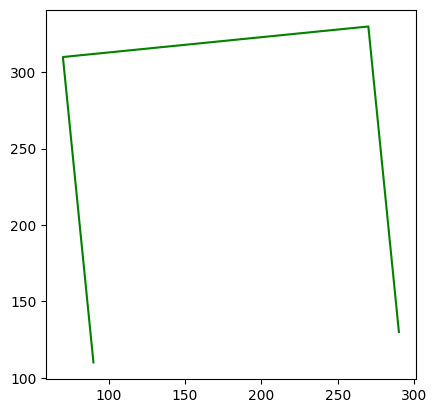

In [112]:
plt.plot(pb2[:, 0], pb2[:, 1], "g-")

plt.axis("square")

(np.float64(59.0), np.float64(301.0), np.float64(99.0), np.float64(341.0))

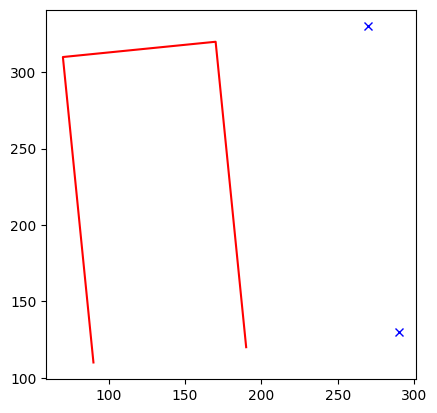

In [113]:
plt.plot(pb[:, 0], pb[:, 1], "r-")
plt.plot(sq_pts[:, 0], sq_pts[:, 1], "bx")


plt.axis("square")

In [114]:
a_params = affine_coeffs(pb, pb2)
a_params

array([ 5.04950495e-01, -4.95049505e-02,  5.00000000e+01, -4.95049505e-02,
        9.95049505e-01,  5.00000000e+00])

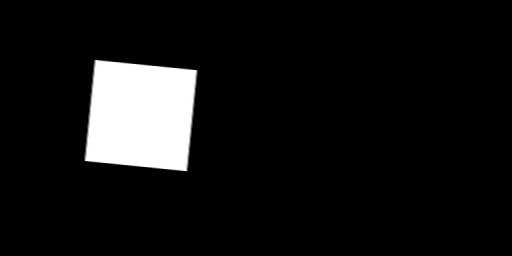

In [115]:
img3 = img_gb.transform((512, 256), Image.AFFINE, a_params, Image.BICUBIC)
img3

(np.float64(59.0), np.float64(301.0), np.float64(99.0), np.float64(341.0))

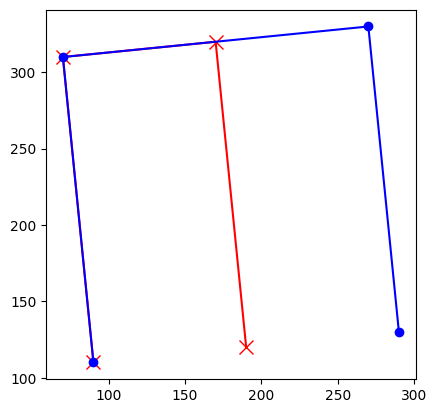

In [116]:
plt.plot(pb[:, 0], pb[:, 1], "r-x", ms=10)
plt.plot(
    pb2[:, 0],
    pb2[:, 1],
    "b-o",
)
plt.axis("square")

In [117]:
pb[0:3, :]

array([[ 90., 110.],
       [ 70., 310.],
       [170., 320.]])

In [118]:
a_params3 = affine_coeffs(pb[0:3, :], pb2[0:3, :])
a_params, a_params3

(array([ 5.04950495e-01, -4.95049505e-02,  5.00000000e+01, -4.95049505e-02,
         9.95049505e-01,  5.00000000e+00]),
 array([ 5.04950495e-01, -4.95049505e-02,  5.00000000e+01, -4.95049505e-02,
         9.95049505e-01,  5.00000000e+00]))

In [119]:
def make_square_gauge_image(img, xy):
    """
    given xy  mouse click points as
    xy = np.array([[TLx, TLy],
                [BLx, BLy],
                [BRx, BRy]])
    and an image as a PIL.Image
    return a scaled an skewed imgae such that the points given by xy now form a square
    """
    # find corners of square
    length = ((xy[0, :] - xy[1, :]) ** 2).sum() ** 0.5
    width = ((xy[1, :] - xy[2, :]) ** 2).sum() ** 0.5
    dirn = (xy[2, :] - xy[1, :]) / width
    xy2 = xy
    xy2[2, :] = xy[2, :] + length * dirn
    # find transform coeeficients
    a_params = affine_coeffs(xy, xy2)
    # estimate approximate size of new image
    scale = length / width
    size = (img.size[0], int(scale * img.size[1]))
    img_sq = img.transform(size, Image.AFFINE, a_params, Image.BICUBIC)
    return img_sq, a_params, xy2


In [120]:
from ls_fringeapp.load_equipment_data import repo_folder

out_image_folder = repo_folder / "tests" / "data" / "mock_square_gauges"
to_process = repo_folder / "tests" / "data" / "Platen03" / "cropped" / "fflog.txt"

In [121]:
d2 = np.genfromtxt(
    to_process,
    delimiter="\t",
    dtype=None,
    usecols=(0, 1, 2, 3, 4, 5, 6, 7),
    unpack=True,
)
ffracs = np.array(d2[0])
fns = d2[1]
xys = np.array(d2[2:8]).T

ffracs[0], fns[0], xys[0]

(np.float64(0.256637),
 np.str_('MSL-03_01-G.bmp'),
 array([   7.8047,  109.37  , 1023.7   ,  178.58  ,  996.06  ,  413.88  ]))

In [122]:
index = 0
xy = xys[index].reshape(-1, 2)
img_filename = to_process.parent / fns[index]
img = Image.open(img_filename)
xy

array([[   7.8047,  109.37  ],
       [1023.7   ,  178.58  ],
       [ 996.06  ,  413.88  ]])

In [134]:
# find corners of square
length = ((xy[0, :] - xy[1, :]) ** 2).sum() ** 0.5
width = ((xy[1, :] - xy[2, :]) ** 2).sum() ** 0.5
dirn = (xy[2, :] - xy[1, :]) / width
xy2 = np.array(xy)
xy2[2, :] = xy[2, :] + length * dirn
xy, xy2

(array([[   7.8047    ,  109.37      ],
        [1023.7       ,  178.58      ],
        [ 877.26593263, 1425.17681806]]),
 array([[   7.8047    ,  109.37      ],
        [1023.7       ,  178.58      ],
        [ 758.47186527, 2436.47363612]]))

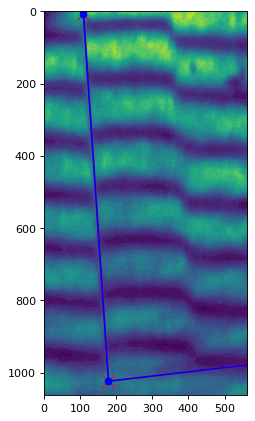

In [135]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

img = img.convert("L")
img_array = np.asarray(img)
axes.imshow(img_array)
axes.axis("image")
axes.plot(xy[:, 1], xy[:, 0], "r-x", ms=10)
axes.plot(
    xy2[:, 1],
    xy2[:, 0],
    "b-o",
)
# for i, row in enumerate(xy):
#     axes.text(row[0], row[1] + 50, f"{i}", ha="center")


In [136]:
a_params_gb = affine_coeffs(xy, xy2)
a_params_gb

array([ 9.96444100e-01,  5.21950817e-02, -5.68082335e+00,  3.02714600e-02,
        5.55661986e-01,  4.83609890e+01])

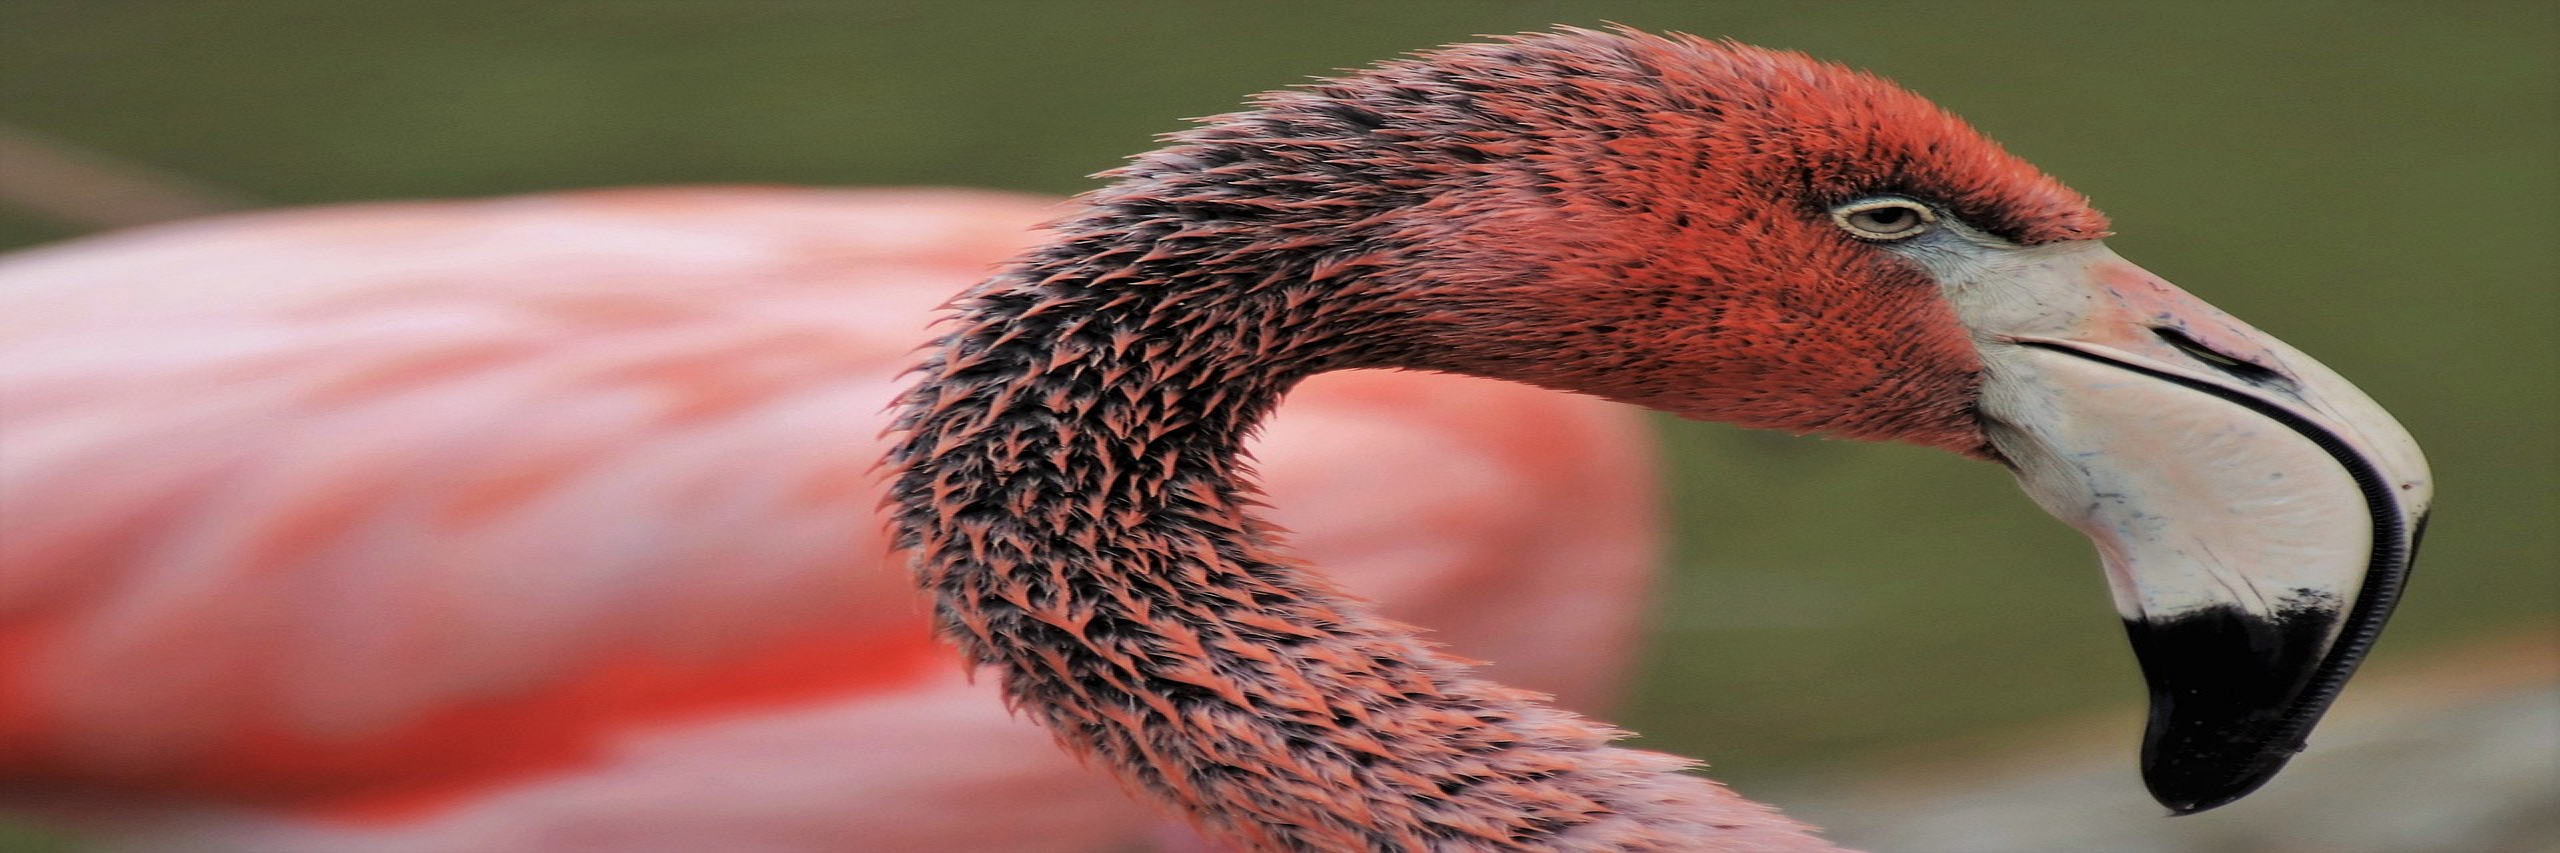

In [145]:
# simple scale with AFFINE transform
im = Image.open("/home/elfnor/gits/ls-fringeapp/tests/data/flamingos-4906958_1280.jpg")
a_scale = (1 / 2.0, 0, 0, 0, 1.0, 0.0)
im_scale = im.transform(
    (2 * im.size[0], im.size[1]),
    Image.AFFINE,
    a_scale,
    Image.BICUBIC,
)
im_scale

(np.float64(-0.5), np.float64(2559.5), np.float64(852.5), np.float64(-0.5))

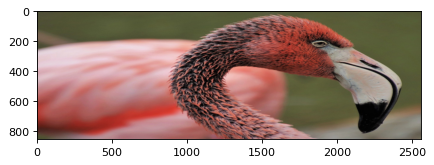

In [147]:
im_array = np.asarray(im_scale)
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.imshow(im_array)
axes.axis("image")

(np.float64(-0.5), np.float64(1279.5), np.float64(852.5), np.float64(-0.5))

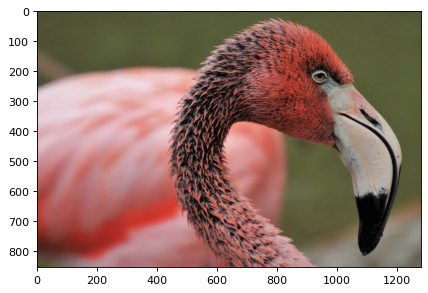

In [148]:
im_array = np.asarray(im)
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.imshow(im_array)
axes.axis("image")

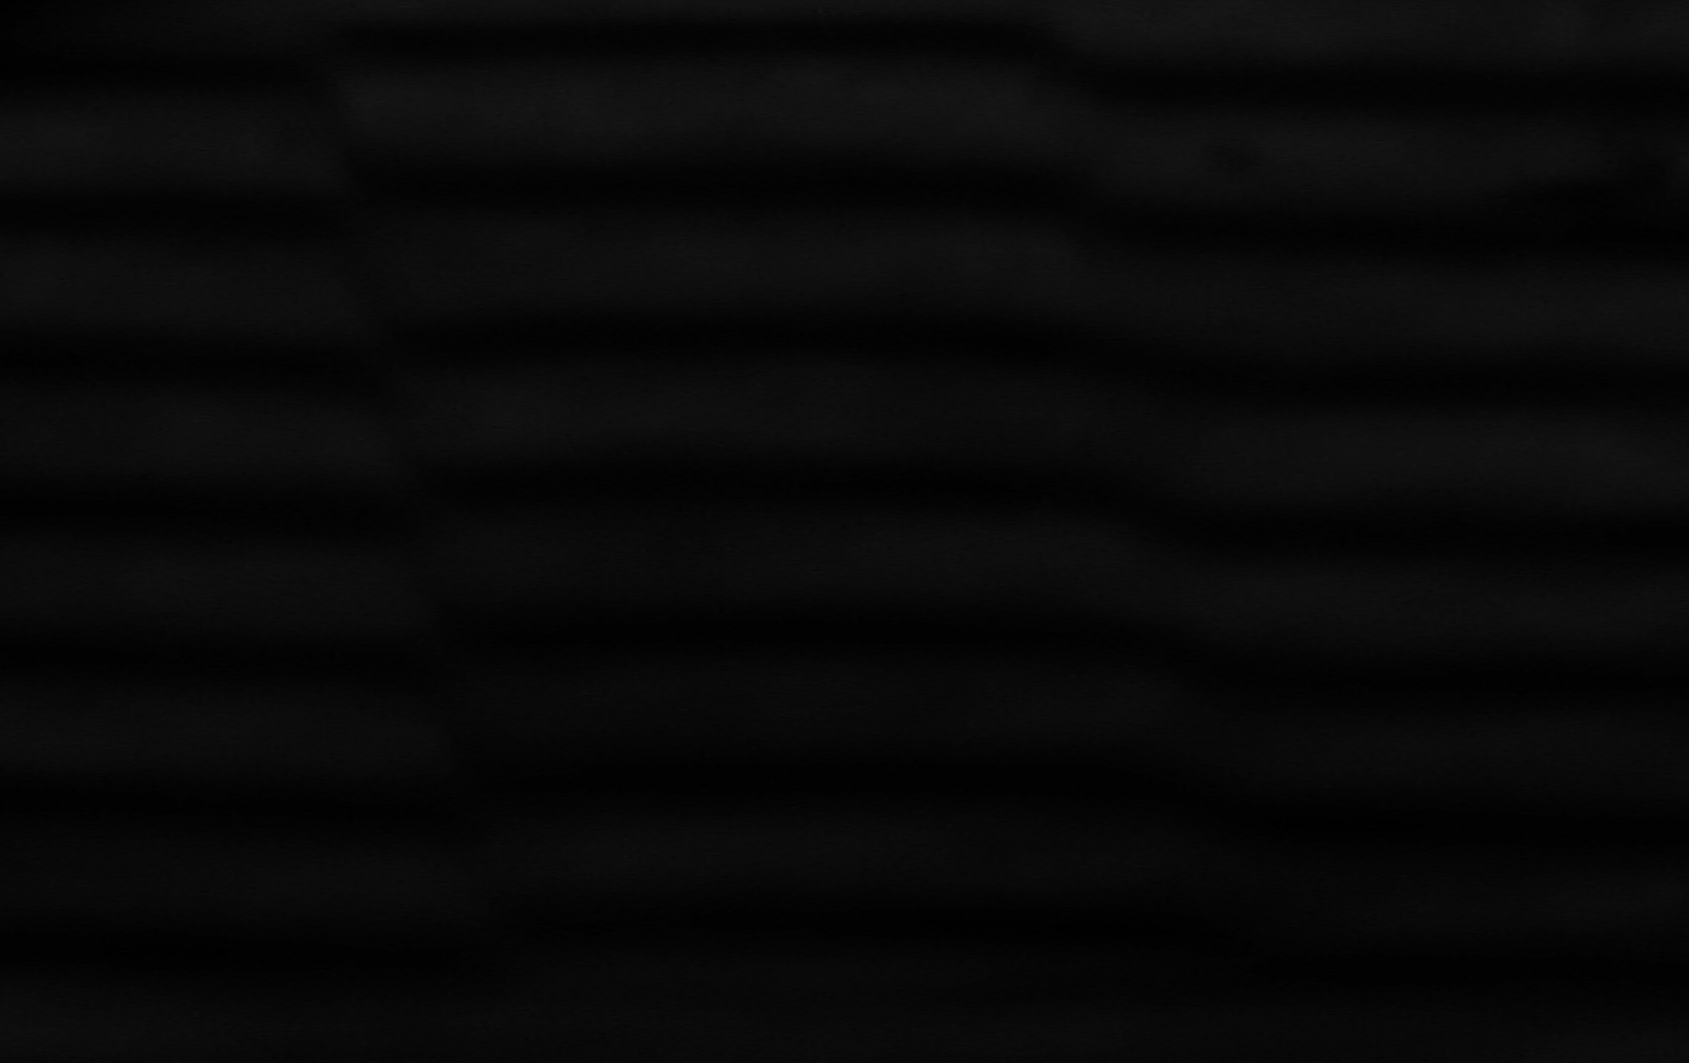

In [ ]:
# simple scale with AFFINE transform
scale = (3.0, 1.0)
a_scale = (1 / scale[0], 0, 0, 0, 1 / scale[1], 0.0)
im_scale = img.transform(
    (int(scale[0] * img.size[0]), int(scale[1] * img.size[1])),
    Image.AFFINE,
    a_scale,
    Image.BICUBIC,
)
im_scale

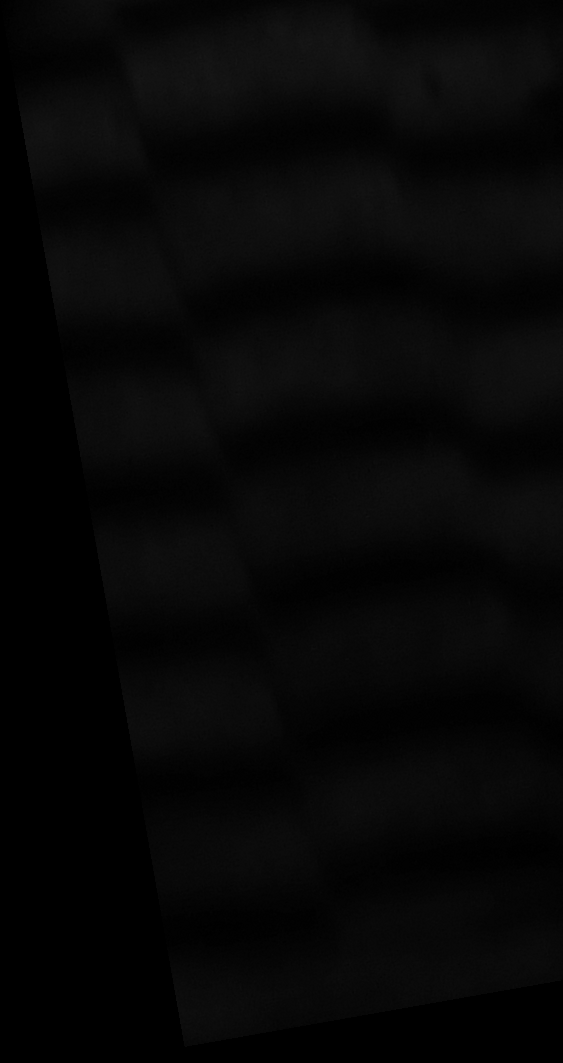

In [154]:
# simple rotate with AFFINE transform
# no image exapansion
angle_deg = 10
phi = np.deg2rad(angle_deg)
c, s = np.cos(phi), np.sin(phi)
a_rot = (c, -s, 0.0, s, c, 0.0)
im_rot = img.transform(
    img.size,
    Image.AFFINE,
    a_rot,
    Image.BICUBIC,
)
im_rot